In [28]:
# Feature Selection: Backward Elimination, Forward Elimination, Bidirectional Elimination, Score Comparision
# Feature Extraction: PCA, LDA, Kernel PCA

In [29]:
# We do not considered the dependent variable. 
# Thus, PCAs are unsupervised models
# PCA can reduce the # of variable that are relavant to the dataset

In [30]:
# We will implement PCA's in the logistic regression

In [31]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [32]:
# Loading up the dataset

df = pd.read_csv('../../archive/wine.csv')
df.head()

# Setting up the X and y values
y = df['Customer_Segment']
Xs = df.drop(['Customer_Segment'], axis=1)

In [33]:
# Dataset: We have a lot of information of people who like wine
# The owner was able to use clustering to segment the dataset inot three different customers
# The indepdent variable of types of wines which are represented with diff types of chemicals in it
# We can do perform machine learning
# Using the indepdent variables, we can predict where a customer is most lilely to be clustered in 
# We need to use PCA's to understand the predictors and the decison boundaries

In [34]:
# Splitting the data set into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=0)

In [35]:
# Feature Scaling: This is requried we are performing PCA's or LDA's
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# We are only using the transform and not the fit transform because we already fit the model
X_test = sc.transform(X_test)

In [36]:
# pca = PCA(n_components=2) # Should be used first to see how much PCA's should be used

# Given that we had 13 indepdent variables, we must have 13 different PCA's 
# Our goal is try to find the indepedent variables that can bring the most value to our model

# Using 2 PCA's, we will approx have 55% of the variance (we are using two bc we would like to visualize the results)

In [37]:
# Applying PCA
# PCA's are performed after the data preprocessing phase and before fitting a model in the training set
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # We will create a vector of possible n components

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [38]:
# Fitting the classifier to the training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
# Predicting the values of the testing set

y_pred = classifier.predict(X_test)

In [40]:
# Checking for the results
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

# Accuracy is 97.2%

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

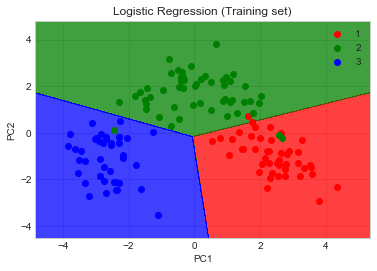

In [41]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

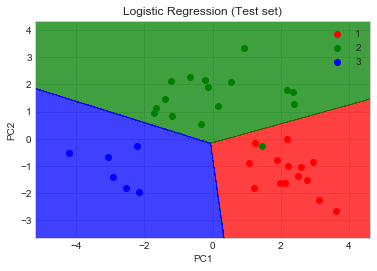

In [42]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()